In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report
from sklearn.model_selection import learning_curve
from imblearn.over_sampling import RandomOverSampler

In [ ]:
world_cup = pd.read_csv("/content/Innings_results_data_of_match.csv")
world_cup.head()

,Team,Score,Overs,RPO,Inns,Result,Opposition,Ground,Start Date
0,England,190,39.4x8,3.60,1,lost,v Australia,Melbourne,5 Jan 1971
1,Australia,191/5,34.6x8,4.12,2,won,v England,Melbourne,5 Jan 1971
2,Australia,222/8,55.0,4.03,1,lost,v England,Manchester,24 Aug 1972
3,England,226/4,49.1,4.59,2,won,v Australia,Manchester,24 Aug 1972
4,England,236/9,55.0,4.29,1,lost,v Australia,Lord's,26 Aug 1972


In [ ]:
world_cup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9396 entries, 0 to 9395
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Team        9396 non-null   object
 1   Score       9396 non-null   object
 2   Overs       9396 non-null   object
 3   RPO         9396 non-null   object
 4   Inns        9396 non-null   int64 
 5   Result      9396 non-null   object
 6   Opposition  9396 non-null   object
 7   Ground      9396 non-null   object
 8   Start Date  9396 non-null   object
dtypes: int64(1), object(8)
memory usage: 660.8+ KB


In [ ]:
# # Drop the 'Start Date' column
# world_cup.drop(columns = ['Start Date'], axis=1,inplace=True)

In [ ]:
world_cup.head()

,Team,Score,Overs,RPO,Inns,Result,Opposition,Ground,Start Date
0,England,190,39.4x8,3.60,1,lost,v Australia,Melbourne,5 Jan 1971
1,Australia,191/5,34.6x8,4.12,2,won,v England,Melbourne,5 Jan 1971
2,Australia,222/8,55.0,4.03,1,lost,v England,Manchester,24 Aug 1972
3,England,226/4,49.1,4.59,2,won,v Australia,Manchester,24 Aug 1972
4,England,236/9,55.0,4.29,1,lost,v Australia,Lord's,26 Aug 1972


In [ ]:
# Replace "/" and subsequent characters in the 'Score' column
world_cup['Score'] = world_cup['Score'].str.replace(r'/.*', '', regex=True)

# Display the modified DataFrame
print(world_cup.head())

        Team Score   Overs   RPO  Inns Result   Opposition      Ground  \
0    England   190  39.4x8  3.60     1   lost  v Australia   Melbourne   
1  Australia   191  34.6x8  4.12     2    won    v England   Melbourne   
2  Australia   222    55.0  4.03     1   lost    v England  Manchester   
3    England   226    49.1  4.59     2    won  v Australia  Manchester   
4    England   236    55.0  4.29     1   lost  v Australia      Lord's   

    Start Date  
0   5 Jan 1971  
1   5 Jan 1971  
2  24 Aug 1972  
3  24 Aug 1972  
4  26 Aug 1972  


In [ ]:
world_cup["Score"].unique()

array(['190', '191', '222', '226', '236', '240', '179', '180', '187',
       '165', '158', '159', 'DNB', '167', '181', '182', '189', '194',
       '195', '265', '234', '266', '171', '172', '244', '246', '81', '84',
       '136', '15', '227', '35', '334', '132', '309', '128', '278', '205',
       '86', '87', '186', '120', '123', '328', '276', '267', '290', '94',
       '230', '233', '192', '330', '138', '93', '291', '274', '224',
       '225', '154', '155', '156', '202', '207', '221', '185', '223',
       '173', '198', '197', '176', '169', '70', '242', '208', '212',
       '151', '152', '122', '313', '139', '140', '217', '85', '248',
       '206', '170', '166', '79', '83', '183', '17', '101', '102', '215',
       '95', '160', '286', '45', '46', '238', '105', '106', '293', '250',
       '193', '196', '211', '209', '271', '264', '218', '163', '164',
       '213', '203', '174', '235', '320', '273', '127', '219', '289',
       '200', '201', '142', '162', '157', '204', '63', '64', '112', '11

In [ ]:
# Drop rows where 'Score' is 'DNB'
world_cup = world_cup[world_cup['Score'] != 'DNB']

# Resetting the index after dropping rows
world_cup.reset_index(drop=True, inplace=True)

# Display the modified DataFrame
print(world_cup.head())

        Team Score   Overs   RPO  Inns Result   Opposition      Ground  \
0    England   190  39.4x8  3.60     1   lost  v Australia   Melbourne   
1  Australia   191  34.6x8  4.12     2    won    v England   Melbourne   
2  Australia   222    55.0  4.03     1   lost    v England  Manchester   
3    England   226    49.1  4.59     2    won  v Australia  Manchester   
4    England   236    55.0  4.29     1   lost  v Australia      Lord's   

    Start Date  
0   5 Jan 1971  
1   5 Jan 1971  
2  24 Aug 1972  
3  24 Aug 1972  
4  26 Aug 1972  


In [ ]:
world_cup["Overs"].unique()

array(['39.4x8', '34.6x8', '55.0', '49.1', '51.3', '38.3x8', '33.3x8',
       '52.5', '45.3', '48.3', '54.0', '54.3', '42.2', '35.0x8', '24.3x8',
       '53.5', '51.1', '47.3', '48.5', '50.0', '42.5', '35.0', '18.0',
       '34.5x8', '37.1x8', '34.1x8', '4.0x8', '10.0x8', '60.0', '53.0',
       '37.2', '20.4', '55.3', '29.5', '59.4', '52.3', '58.5', '53.4',
       '46.0', '50.1', '36.2', '28.4', '52.2', '40.1', '58.4', '37.6x8',
       '31.5x8', '30.3x8', '31.6x8', '41.0', '47.5', '32.0', '31.4',
       '45.0', '43.2', '45.2', '25.2', '54.2', '53.2', '33.7x8', '32.7x8',
       '36.0', '34.4', '47.0', '41.2', '40.0', '34.2', '16.5', '37.4',
       '7.2x8', '33.5x8', '28.2x8', '40.0x8', '38.6x8', '31.7x8',
       '21.5x8', '53.1', '56.5', '47.4', '47.1', '55.5', '57.0', '57.1',
       '40.3', '13.5', '54.1', '33.2', '26.0', '56.0', '56.2', '51.0',
       '49.3', '49.0', '48.0', '47.2', '46.5', '45.1', '48.4', '49.4',
       '51.2', '35.3', '42.1', '49.5', '25.5', '21.0', '34.0', '29.0',


In [ ]:
# Replace 'x' and subsequent characters in the 'Overs' column
world_cup['Overs'] = world_cup['Overs'].str.replace(r'x.*', '', regex=True)

# Display the modified DataFrame
print(world_cup.head())

        Team Score Overs   RPO  Inns Result   Opposition      Ground  \
0    England   190  39.4  3.60     1   lost  v Australia   Melbourne   
1  Australia   191  34.6  4.12     2    won    v England   Melbourne   
2  Australia   222  55.0  4.03     1   lost    v England  Manchester   
3    England   226  49.1  4.59     2    won  v Australia  Manchester   
4    England   236  55.0  4.29     1   lost  v Australia      Lord's   

    Start Date  
0   5 Jan 1971  
1   5 Jan 1971  
2  24 Aug 1972  
3  24 Aug 1972  
4  26 Aug 1972  


In [ ]:
world_cup["Overs"].unique()

array(['39.4', '34.6', '55.0', '49.1', '51.3', '38.3', '33.3', '52.5',
       '45.3', '48.3', '54.0', '54.3', '42.2', '35.0', '24.3', '53.5',
       '51.1', '47.3', '48.5', '50.0', '42.5', '18.0', '34.5', '37.1',
       '34.1', '4.0', '10.0', '60.0', '53.0', '37.2', '20.4', '55.3',
       '29.5', '59.4', '52.3', '58.5', '53.4', '46.0', '50.1', '36.2',
       '28.4', '52.2', '40.1', '58.4', '37.6', '31.5', '30.3', '31.6',
       '41.0', '47.5', '32.0', '31.4', '45.0', '43.2', '45.2', '25.2',
       '54.2', '53.2', '33.7', '32.7', '36.0', '34.4', '47.0', '41.2',
       '40.0', '34.2', '16.5', '37.4', '7.2', '33.5', '28.2', '38.6',
       '31.7', '21.5', '53.1', '56.5', '47.4', '47.1', '55.5', '57.0',
       '57.1', '40.3', '13.5', '54.1', '33.2', '26.0', '56.0', '56.2',
       '51.0', '49.3', '49.0', '48.0', '47.2', '46.5', '45.1', '48.4',
       '49.4', '51.2', '35.3', '42.1', '49.5', '25.5', '21.0', '34.0',
       '29.0', '48.1', '43.1', '8.0', '39.3', '46.4', '48.2', '51.4',
       '5

In [ ]:
# Check if the 'Overs' column contains '*' or '/'
contains_star_or_slash = world_cup['Score'].str.contains(r'[\*/]', regex=True)

# Display rows where '*' or '/' are present in the 'Overs' column
rows_with_star_or_slash = world_cup[contains_star_or_slash]
print(rows_with_star_or_slash)

Empty DataFrame
Columns: [Team, Score, Overs, RPO, Inns, Result, Opposition, Ground, Start Date]
Index: []


In [ ]:
world_cup.head()

,Team,Score,Overs,RPO,Inns,Result,Opposition,Ground,Start Date
0,England,190,39.4,3.60,1,lost,v Australia,Melbourne,5 Jan 1971
1,Australia,191,34.6,4.12,2,won,v England,Melbourne,5 Jan 1971
2,Australia,222,55.0,4.03,1,lost,v England,Manchester,24 Aug 1972
3,England,226,49.1,4.59,2,won,v Australia,Manchester,24 Aug 1972
4,England,236,55.0,4.29,1,lost,v Australia,Lord's,26 Aug 1972


In [ ]:
# Replace 'v ' with an empty string in the 'Opposition' column
world_cup['Opposition'] = world_cup['Opposition'].str.replace(r'v ', '')

# Display the modified DataFrame
print(world_cup.head())

        Team Score Overs   RPO  Inns Result Opposition      Ground  \
0    England   190  39.4  3.60     1   lost  Australia   Melbourne   
1  Australia   191  34.6  4.12     2    won    England   Melbourne   
2  Australia   222  55.0  4.03     1   lost    England  Manchester   
3    England   226  49.1  4.59     2    won  Australia  Manchester   
4    England   236  55.0  4.29     1   lost  Australia      Lord's   

    Start Date  
0   5 Jan 1971  
1   5 Jan 1971  
2  24 Aug 1972  
3  24 Aug 1972  
4  26 Aug 1972  


In [ ]:
# columns = world_cup.columns
# for col in columns:
world_cup["Opposition"].unique()
# print(f"uniques values in {col} are : {unique_values}")

array(['Australia', 'England', 'Pakistan', 'New Zealand', 'West Indies',
       'India', 'East Africa', 'Sri Lanka', 'Canada', 'Zimbabwe',
       'Bangladesh', 'South Africa', 'U.A.E.', 'Netherlands', 'Kenya',
       'Scotland', 'Namibia', 'Hong Kong', 'U.S.A.', 'Asia XI',
       'ICC World XI', 'Africa XI', 'Bermuda', 'Ireland', 'Afghanistan',
       'P.N.G.', 'Nepal', 'Oman', 'Jersey'], dtype=object)

In [ ]:
world_cup["Result"].unique()

array(['lost', 'won', 'n/r', 'tied'], dtype=object)

In [ ]:
world_cup = world_cup[world_cup["Result"].isin(["won","lost"])]

# Reset the index
world_cup.reset_index(drop=True, inplace=True)

# Print the updated DataFrame
print(world_cup.head())

        Team Score Overs   RPO  Inns Result Opposition      Ground  \
0    England   190  39.4  3.60     1   lost  Australia   Melbourne   
1  Australia   191  34.6  4.12     2    won    England   Melbourne   
2  Australia   222  55.0  4.03     1   lost    England  Manchester   
3    England   226  49.1  4.59     2    won  Australia  Manchester   
4    England   236  55.0  4.29     1   lost  Australia      Lord's   

    Start Date  
0   5 Jan 1971  
1   5 Jan 1971  
2  24 Aug 1972  
3  24 Aug 1972  
4  26 Aug 1972  


In [ ]:
world_cup.shape

(8982, 9)

In [ ]:
# # Convert 'Start Date' column to datetime format
# world_cup['Start Date'] = pd.to_datetime(world_cup['Start Date'])

# # Print the updated DataFrame
# print(world_cup.head())

In [ ]:
world_cup["Ground"].unique()

array(['Melbourne', 'Manchester', "Lord's", 'Birmingham', 'Christchurch',
       'Swansea', 'Leeds', 'The Oval', 'Dunedin', 'Nottingham',
       'Adelaide', 'Auckland', 'Scarborough', 'Sialkot', 'Albion',
       'Sahiwal', 'Lahore', "St John's", 'Castries', 'Quetta', 'Sydney',
       'Brisbane', 'Karachi', 'Perth', 'Kingstown', 'Hamilton',
       'Ahmedabad', 'Jalandhar', 'Cuttack', 'Colombo (SSC)', 'Wellington',
       'Amritsar', 'Delhi', 'Hyderabad (Sind)', 'Bengaluru', 'Gujranwala',
       'Multan', 'Port of Spain', 'Napier', "St George's",
       'Colombo (PSS)', 'Taunton', 'Leicester', 'Bristol', 'Worcester',
       'Southampton', 'Derby', 'Tunbridge Wells', 'Chelmsford',
       'Hyderabad (Deccan)', 'Jaipur', 'Srinagar', 'Vadodara', 'Indore',
       'Jamshedpur', 'Guwahati', 'Moratuwa', 'Sharjah', 'Kingston',
       'New Delhi', 'Peshawar', 'Faisalabad', 'Pune', 'Hobart', 'Nagpur',
       'Chandigarh', 'Bridgetown', 'Rawalpindi', 'Launceston', 'Kandy',
       'Colombo (RPS)', 'R

In [ ]:
world_cup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8982 entries, 0 to 8981
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Team        8982 non-null   object
 1   Score       8982 non-null   object
 2   Overs       8982 non-null   object
 3   RPO         8982 non-null   object
 4   Inns        8982 non-null   int64 
 5   Result      8982 non-null   object
 6   Opposition  8982 non-null   object
 7   Ground      8982 non-null   object
 8   Start Date  8982 non-null   object
dtypes: int64(1), object(8)
memory usage: 631.7+ KB


In [ ]:
# world_cup["Score"].unique()

In [ ]:
# Replace non-numeric values with NaN
world_cup['Score'] = pd.to_numeric(world_cup['Score'], errors='coerce')

# # Check the unique values again
# print(world_cup['Score'].unique())


In [ ]:
# Replace non-numeric values with NaN
world_cup['Overs'] = pd.to_numeric(world_cup['Overs'], errors='coerce')

In [ ]:
# Replace non-numeric values with NaN
world_cup['RPO'] = pd.to_numeric(world_cup['RPO'], errors='coerce')

In [ ]:
world_cup['RPO'].dtype

dtype('float64')

In [ ]:
world_cup.describe(include = "all")

,Team,Score,Overs,RPO,Inns,Result,Opposition,Ground,Start Date
count,8982,8982.000000,8982,8982.000000,8982.000000,8982,8982,8982,8982
unique,29,NaN,293,NaN,NaN,2,29,188,3820
top,India,NaN,50.0,NaN,NaN,lost,India,Sharjah,4 Feb 2007
freq,996,NaN,3157,NaN,NaN,4491,996,490,12
mean,NaN,219.504453,NaN,4.897523,1.500000,NaN,NaN,NaN,NaN
std,NaN,61.569343,NaN,1.115869,0.500028,NaN,NaN,NaN,NaN
min,NaN,35.000000,NaN,1.110000,1.000000,NaN,NaN,NaN,NaN
25%,NaN,178.000000,NaN,4.140000,1.000000,NaN,NaN,NaN,NaN
50%,NaN,220.000000,NaN,4.830000,1.500000,NaN,NaN,NaN,NaN
75%,NaN,260.000000,NaN,5.580000,2.000000,NaN,NaN,NaN,NaN


In [ ]:
world_cup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8982 entries, 0 to 8981
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Team        8982 non-null   object 
 1   Score       8982 non-null   int64  
 2   Overs       8982 non-null   object 
 3   RPO         8982 non-null   float64
 4   Inns        8982 non-null   int64  
 5   Result      8982 non-null   object 
 6   Opposition  8982 non-null   object 
 7   Ground      8982 non-null   object 
 8   Start Date  8982 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 631.7+ KB


In [ ]:
# Extract the 'Result' column
result_column = world_cup['Result']

# Drop the 'Result' column from the original DataFrame
world_cup.drop(columns=['Result'], inplace=True)

# Concatenate the 'Result' column to the DataFrame as the last column
world_cup = pd.concat([world_cup, result_column], axis=1)


In [ ]:
world_cup.head()

,Team,Score,Overs,RPO,Inns,Opposition,Ground,Start Date,Result
0,England,190,39.4,3.60,1,Australia,Melbourne,5 Jan 1971,lost
1,Australia,191,34.6,4.12,2,England,Melbourne,5 Jan 1971,won
2,Australia,222,55.0,4.03,1,England,Manchester,24 Aug 1972,lost
3,England,226,49.1,4.59,2,Australia,Manchester,24 Aug 1972,won
4,England,236,55.0,4.29,1,Australia,Lord's,26 Aug 1972,lost


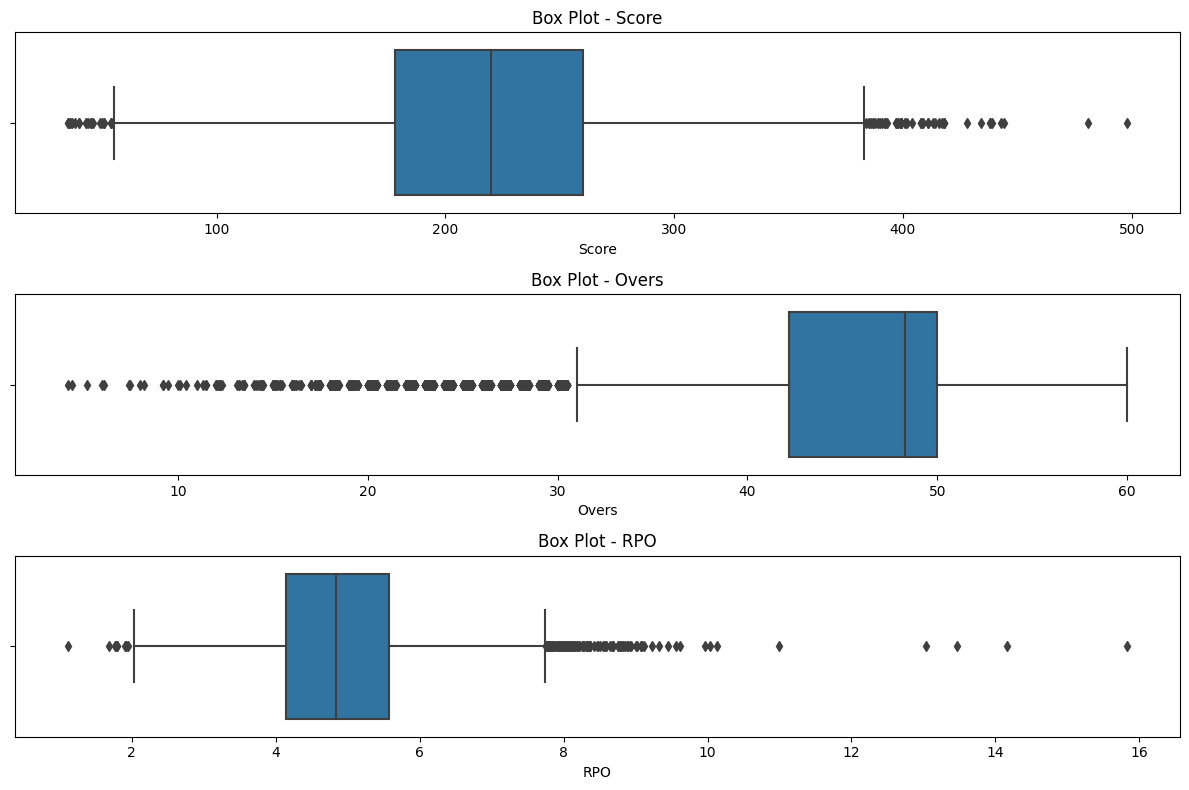

In [ ]:
# Convert relevant columns to numeric
world_cup[['Score', 'Overs', 'RPO']] = world_cup[['Score', 'Overs', 'RPO']].apply(pd.to_numeric, errors='coerce')

# Box plots for each numeric column
plt.figure(figsize=(12, 8))

# Box plot for 'Score'
plt.subplot(3, 1, 1)
sns.boxplot(x=world_cup['Score'])
plt.title('Box Plot - Score')

# Box plot for 'Overs'
plt.subplot(3, 1, 2)
sns.boxplot(x=world_cup['Overs'])
plt.title('Box Plot - Overs')

# Box plot for 'RPO'
plt.subplot(3, 1, 3)
sns.boxplot(x=world_cup['RPO'])
plt.title('Box Plot - RPO')

plt.tight_layout()
plt.show()

In [ ]:
# # Save the cleaned dataset to a CSV file
# world_cup.to_csv('cleaned_innings_results_data.csv', index=False)


In [ ]:
world_cup.drop(columns = ['Start Date'], axis=1,inplace=True)

In [ ]:
# Specify the numerical columns
numerical_columns = ['Score', 'Overs', 'RPO']

# Calculate the IQR for each numerical column
Q1 = world_cup[numerical_columns].quantile(0.25)
Q3 = world_cup[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Find outliers
outliers = ((world_cup[numerical_columns] < (Q1 - 1.5 * IQR)) | (world_cup[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)

# Display the rows containing outliers
print(world_cup[outliers])

              Team  Score  Overs   RPO  Inns   Opposition        Ground Result
17       Australia    195   24.3  6.00     2  New Zealand       Dunedin    won
27        Pakistan     84   18.0  4.66     2      England    Birmingham    won
37     West Indies     87   20.4  4.20     2    Sri Lanka    Manchester    won
41           India    123   29.5  4.12     2  East Africa         Leeds    won
47     East Africa     94   52.3  1.79     2      England    Birmingham   lost
...            ...    ...    ...   ...   ...          ...           ...    ...
8965     Sri Lanka     55   19.4  2.79     2        India      Wankhede   lost
8968   New Zealand    401   50.0  8.02     1     Pakistan     Bengaluru   lost
8969      Pakistan    200   25.3  7.84     2  New Zealand     Bengaluru    won
8973  South Africa     83   27.1  3.05     2        India  Eden Gardens   lost
8981   New Zealand    172   23.2  7.37     2    Sri Lanka     Bengaluru    won

[748 rows x 8 columns]


In [ ]:
# # Drop rows with outliers in the original DataFrame
# world_cup.drop(world_cup[outliers].index, inplace=True)

# # Reset the index
# world_cup.reset_index(drop=True, inplace=True)

In [ ]:
world_cup.shape

(8982, 8)

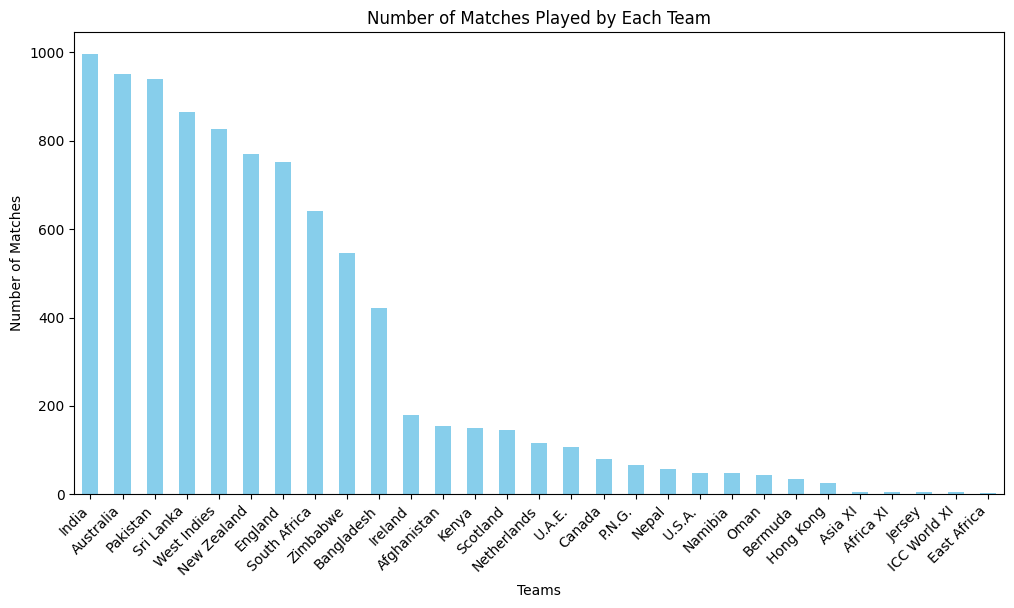

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'world_cup' is your DataFrame
# Replace it with the actual DataFrame name if different
teams_matches = world_cup['Team'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(12, 6))
teams_matches.plot(kind='bar', color='skyblue')
plt.title('Number of Matches Played by Each Team')
plt.xlabel('Teams')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


In [ ]:
# # Checking for rare categories in the 'Opposition' column
# rare_threshold = 48  # Set a threshold based on your data distribution
# opposition_counts = world_cup['Opposition'].value_counts()
# rare_oppositions = opposition_counts[opposition_counts < rare_threshold].index.tolist()

# # Display the rare oppositions
# print("Rare Oppositions:", rare_oppositions)


In [ ]:
# rare_threshold = 48  # Set a threshold based on your data distribution
# opposition_counts = world_cup['Opposition'].value_counts()
# rare_oppositions = opposition_counts[opposition_counts < rare_threshold].index.tolist()

# # Remove rows with rare oppositions
# world_cup = world_cup[~world_cup['Opposition'].isin(rare_oppositions)]

# # Reset index in place
# world_cup.reset_index(drop=True, inplace=True)


In [ ]:
world_cup.head()

,Team,Score,Overs,RPO,Inns,Opposition,Ground,Result
0,England,190,39.4,3.60,1,Australia,Melbourne,lost
1,Australia,191,34.6,4.12,2,England,Melbourne,won
2,Australia,222,55.0,4.03,1,England,Manchester,lost
3,England,226,49.1,4.59,2,Australia,Manchester,won
4,England,236,55.0,4.29,1,Australia,Lord's,lost


In [ ]:
world_cup.shape

(8982, 8)

In [ ]:
world_cup["Result"].value_counts()

lost    4491
won     4491
Name: Result, dtype: int64

In [ ]:
# # One-hot encoding
# encoded_data = pd.get_dummies(world_cup[['Team', 'Opposition', 'Ground', 'Result',"Score","Overs","RPO","Inns"]], columns=['Team', 'Opposition', 'Ground'])


In [ ]:
# encoded_data.head()

In [ ]:
# Label encoding for 'Result'
le = LabelEncoder()
world_cup['Result'] = le.fit_transform(world_cup['Result'])

# Standard scaling for 'Score,' 'Overs,' and 'RPO'
scaler = StandardScaler()
world_cup[['Score', 'Overs', 'RPO']] = scaler.fit_transform(world_cup[['Score', 'Overs', 'RPO']])

# One-hot encoding for 'Team,' 'Opposition,' and 'Ground'
encoded_data = pd.get_dummies(world_cup[['Team', 'Opposition', 'Ground']], columns=['Team', 'Opposition', 'Ground'])

# Concatenate the encoded data with 'Result,' 'Score,' 'Overs,' 'RPO,' and 'Inns'
final_data = pd.concat([world_cup[['Result', 'Score', 'Overs', 'RPO', 'Inns']], encoded_data], axis=1)

In [ ]:
final_data.head()

,Result,Score,Overs,RPO,Inns,Team_Afghanistan,Team_Africa XI,Team_Asia XI,Team_Australia,Team_Bangladesh,...,Ground_Tunbridge Wells,Ground_Utrecht,Ground_Vadodara,Ground_Vijayawada,Ground_Visakhapatnam,Ground_Wankhede,Ground_Wellington,Ground_Whangarei,Ground_Windhoek,Ground_Worcester
0,0,-0.479234,-0.680837,-1.162856,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,-0.462991,-1.290228,-0.696825,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.040535,1.299684,-0.777485,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0.105506,0.550641,-0.275606,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.267933,1.299684,-0.544469,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and labels (y)
X = final_data.drop('Result', axis=1)
y = final_data['Result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classifiers
classifiers = {
    'SVM Linear Kernel': SVC(kernel='linear', random_state=42),
    'SVM Polynomial Kernel': SVC(kernel='poly', random_state=42),
    'SVM RBF Kernel': SVC(kernel='rbf', random_state=42),
    'SVM Sigmoid Kernel': SVC(kernel='sigmoid', random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

results = {}

# # Train and evaluate classifiers
# for name, clf in classifiers.items():
#     clf.fit(X_train, y_train)
#     y_pred = clf.predict(X_test)

#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred, average='weighted')
#     f1 = f1_score(y_test, y_pred, average='weighted')

#     results[name] = {'Accuracy': accuracy, 'Precision': precision, 'F1 Score': f1}

#     # Create a confusion matrix
#     cm = confusion_matrix(y_test, y_pred)

#     # Plot the confusion matrix using Seaborn heatmap
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
#     plt.title(f'Confusion Matrix - {name}')
#     plt.xlabel('Predicted')
#     plt.ylabel('True')
#     plt.show()

# # Display results
# for name, result in results.items():
#     print(f"{name}: Accuracy - {result['Accuracy']:.4f}, Precision - {result['Precision']:.4f}, F1 Score - {result['F1 Score']:.4f}")


In [ ]:
# Create a dictionary to store results
training_results = {}

# Loop through classifiers
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)

    # Predict on the training set
    y_train_pred = clf.predict(X_train)

    # Calculate metrics on the training set
    training_accuracy = accuracy_score(y_train, y_train_pred)
    training_precision = precision_score(y_train, y_train_pred, average='weighted')
    training_f1 = f1_score(y_train, y_train_pred, average='weighted')

    # Store results in the dictionary
    training_results[name] = {'Training Accuracy': training_accuracy,
                             'Training Precision': training_precision,
                             'Training F1 Score': training_f1}

    # Print the results
    print(f"{name} - Training Accuracy: {training_accuracy:.4f}, Training Precision: {training_precision:.4f}, Training F1 Score: {training_f1:.4f}")


SVM Linear Kernel - Training Accuracy: 0.7187, Training Precision: 0.7188, Training F1 Score: 0.7187
SVM Polynomial Kernel - Training Accuracy: 0.7740, Training Precision: 0.7743, Training F1 Score: 0.7739
SVM RBF Kernel - Training Accuracy: 0.7616, Training Precision: 0.7617, Training F1 Score: 0.7616
SVM Sigmoid Kernel - Training Accuracy: 0.5791, Training Precision: 0.5791, Training F1 Score: 0.5791
Random Forest - Training Accuracy: 0.9997, Training Precision: 0.9997, Training F1 Score: 0.9997
XGBoost - Training Accuracy: 0.8441, Training Precision: 0.8445, Training F1 Score: 0.8441


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Training Accuracy: 0.7164, Training Precision: 0.7164, Training F1 Score: 0.7163
Decision Tree - Training Accuracy: 0.9997, Training Precision: 0.9997, Training F1 Score: 0.9997


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {'n_neighbors': range(1, 51)}  # You can adjust the range as needed

# Instantiate the KNN classifier
knn = KNeighborsClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to create the final model
best_knn = KNeighborsClassifier(**best_params)

# Train the final model
best_knn.fit(X_train, y_train)

# Predict on the test set
y_pred_test = best_knn.predict(X_test)
y_pred_train = best_knn.predict(X_train)

# Evaluate the KNN classifier
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')
classification_rep_test = classification_report(y_test, y_pred_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, average='weighted')
f1_train = f1_score(y_train, y_pred_train, average='weighted')
classification_rep_train = classification_report(y_train, y_pred_train)

print("Test Set Metrics:")
print(f"Accuracy - {accuracy_test:.4f}, Precision - {precision_test:.4f}, F1 Score - {f1_test:.4f}")
print("\nClassification Report:\n", classification_rep_test)

print("\nTraining Set Metrics:")
print(f"Accuracy - {accuracy_train:.4f}, Precision - {precision_train:.4f}, F1 Score - {f1_train:.4f}")
print("\nClassification Report:\n", classification_rep_train)


Best Parameters: {'n_neighbors': 49}
Test Set Metrics:
Accuracy - 0.6956, Precision - 0.6956, F1 Score - 0.6956

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.69      0.69       898
           1       0.69      0.70      0.70       899

    accuracy                           0.70      1797
   macro avg       0.70      0.70      0.70      1797
weighted avg       0.70      0.70      0.70      1797


Training Set Metrics:
Accuracy - 0.7101, Precision - 0.7102, F1 Score - 0.7101

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.70      0.71      3593
           1       0.71      0.72      0.71      3592

    accuracy                           0.71      7185
   macro avg       0.71      0.71      0.71      7185
weighted avg       0.71      0.71      0.71      7185



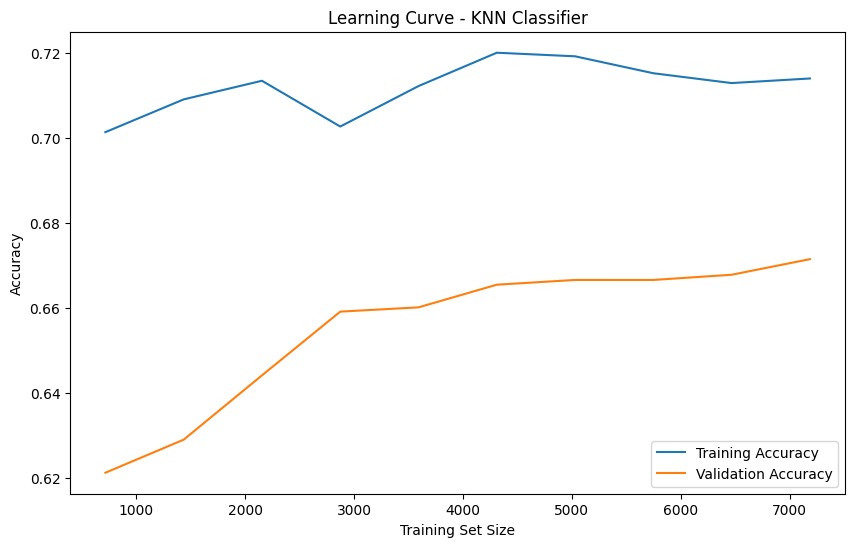

In [ ]:
# Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(best_knn, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - KNN Classifier')
plt.legend()
plt.show()

Best Parameters: {'max_depth': 20, 'min_samples_split': 5}
Random Forest (Test): Accuracy - 0.6945

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.70      0.69      0.69       898
           1       0.69      0.70      0.70       899

    accuracy                           0.69      1797
   macro avg       0.69      0.69      0.69      1797
weighted avg       0.69      0.69      0.69      1797

Random Forest (Train): Accuracy - 0.7968


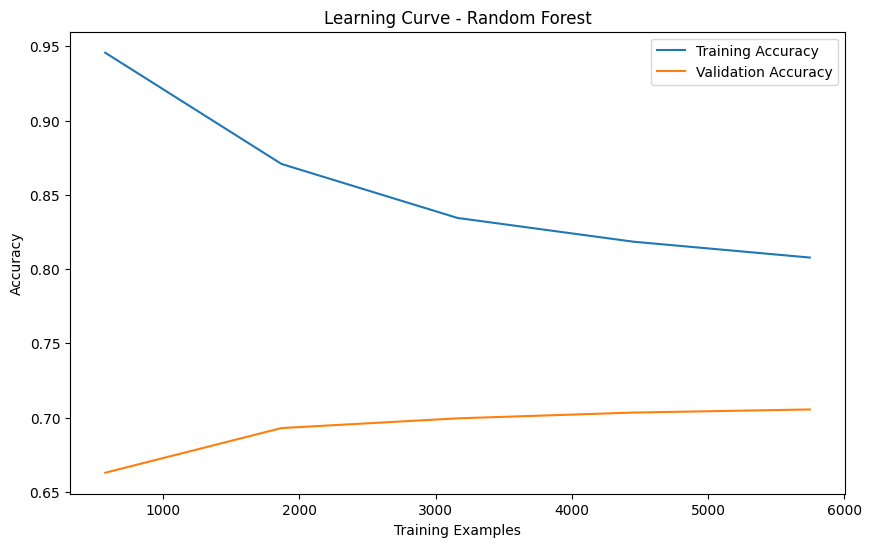

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

# Split the data into features (X) and labels (y)
X = final_data.drop('Result', axis=1)
y = final_data['Result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid to search
param_grid = {
    'max_depth': [5, 10, 15, 20, 25],  # Adjust the values as needed
    'min_samples_split': [2, 5, 10]
}

# Instantiate the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to create the final model
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)

# Train the final model
best_rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_test_pred = best_rf_classifier.predict(X_test)

# Evaluate the final model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Random Forest (Test): Accuracy - {accuracy_test:.4f}")

# Classification Report for Test Set
classification_rep_test = classification_report(y_test, y_test_pred)
print("\nClassification Report (Test Set):\n", classification_rep_test)

# Training Accuracy
y_train_pred = best_rf_classifier.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f"Random Forest (Train): Accuracy - {accuracy_train:.4f}")

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(best_rf_classifier, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.title('Learning Curve - Random Forest')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid to search for SVM with RBF kernel
param_dist = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto', 1, 0.1, 0.01],
}

# Instantiate the SVM classifier
svm_classifier = SVC(random_state=42)

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(svm_classifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the randomized search to the data
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to create the final model
best_svm_classifier = SVC(random_state=42, **best_params)

# Train the final model
best_svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_test_pred = best_svm_classifier.predict(X_test)

# Evaluate the final model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"SVM (Test): Accuracy - {accuracy_test:.4f}")

# Classification Report for Test Set
classification_rep_test = classification_report(y_test, y_test_pred)
print("\nClassification Report (Test Set):\n", classification_rep_test)

# Training Accuracy
y_train_pred = best_svm_classifier.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f"SVM (Train): Accuracy - {accuracy_train:.4f}")

# Classification Report for Training Set
classification_rep_train = classification_report(y_train, y_train_pred)
print("\nClassification Report (Training Set):\n", classification_rep_train)


Best Parameters: {'kernel': 'rbf', 'gamma': 0.1, 'C': 1}
SVM (Test): Accuracy - 0.6884

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.69      0.68      0.69       898
           1       0.69      0.69      0.69       899

    accuracy                           0.69      1797
   macro avg       0.69      0.69      0.69      1797
weighted avg       0.69      0.69      0.69      1797

SVM (Train): Accuracy - 0.7543

Classification Report (Training Set):
               precision    recall  f1-score   support

           0       0.76      0.75      0.75      3593
           1       0.75      0.76      0.76      3592

    accuracy                           0.75      7185
   macro avg       0.75      0.75      0.75      7185
weighted avg       0.75      0.75      0.75      7185



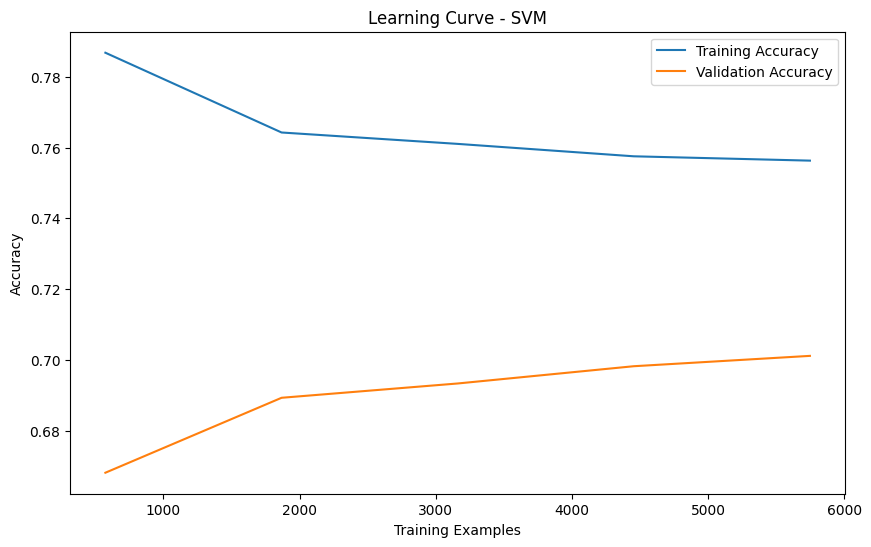

In [ ]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(best_svm_classifier, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.title('Learning Curve - SVM')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from joblib import parallel_backend

# Assuming you have X_train, y_train, X_test, y_test defined

# Define the parameter grid to search for SVM with Poly kernel
param_dist = {
    'C': [0.1, 1, 10],
    'kernel': ['poly'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto', 1, 0.1, 0.01],
}

# Instantiate the SVM classifier
svm_classifier = SVC(random_state=42)

# Enable parallel processing using joblib
with parallel_backend('threading', n_jobs=-1):
    # Instantiate RandomizedSearchCV
    random_search = RandomizedSearchCV(svm_classifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)

    # Fit the randomized search to the data
    random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to create the final model
best_svm_classifier = SVC(random_state=42, **best_params)

# Train the final model
best_svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_test_pred = best_svm_classifier.predict(X_test)

# Evaluate the final model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"SVM (Test): Accuracy - {accuracy_test:.4f}")

# Classification Report for Test Set
classification_rep_test = classification_report(y_test, y_test_pred)
print("\nClassification Report (Test Set):\n", classification_rep_test)

# Training Accuracy
y_train_pred = best_svm_classifier.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f"SVM (Train): Accuracy - {accuracy_train:.4f}")

# Classification Report for Training Set
classification_rep_train = classification_report(y_train, y_train_pred)
print("\nClassification Report (Training Set):\n", classification_rep_train)


Best Parameters: {'kernel': 'poly', 'gamma': 'scale', 'degree': 3, 'C': 1}
SVM (Test): Accuracy - 0.6817

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.67      0.71      0.69       898
           1       0.69      0.65      0.67       899

    accuracy                           0.68      1797
   macro avg       0.68      0.68      0.68      1797
weighted avg       0.68      0.68      0.68      1797

SVM (Train): Accuracy - 0.7740

Classification Report (Training Set):
               precision    recall  f1-score   support

           0       0.76      0.79      0.78      3593
           1       0.78      0.76      0.77      3592

    accuracy                           0.77      7185
   macro avg       0.77      0.77      0.77      7185
weighted avg       0.77      0.77      0.77      7185



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from joblib import parallel_backend

# Assuming you have X_train, y_train, X_test, y_test defined

# Define the parameter grid to search for Decision Tree
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

# Instantiate the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Enable parallel processing using joblib
with parallel_backend('threading', n_jobs=-1):
    # Instantiate RandomizedSearchCV
    random_search = RandomizedSearchCV(dt_classifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)

    # Fit the randomized search to the data
    random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to create the final model
best_dt_classifier = DecisionTreeClassifier(random_state=42, **best_params)

# Train the final model
best_dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_test_pred = best_dt_classifier.predict(X_test)

# Evaluate the final model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Decision Tree (Test): Accuracy - {accuracy_test:.4f}")

# Classification Report for Test Set
classification_rep_test = classification_report(y_test, y_test_pred)
print("\nClassification Report (Test Set):\n", classification_rep_test)

# Training Accuracy
y_train_pred = best_dt_classifier.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f"Decision Tree (Train): Accuracy - {accuracy_train:.4f}")

# Classification Report for Training Set
classification_rep_train = classification_report(y_train, y_train_pred)
print("\nClassification Report (Training Set):\n", classification_rep_train)


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

Best Parameters: {'splitter': 'best', 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'gini'}
Decision Tree (Test): Accuracy - 0.6055

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.58      0.73      0.65       898
           1       0.64      0.48      0.55       899

    accuracy                           0.61      1797
   macro avg       0.61      0.61      0.60      1797
weighted avg       0.61      0.61      0.60      1797

Decision Tree (Train): Accuracy - 0.6294

Classification Report (Training Set):
               precision    recall  f1-score   support

           0       0.60      0.75      0.67      3593
           1       0.67      0.51      0.58      3592

    accuracy                           0.63      7185
   macro avg       0.64      0.63      0.62      7185
weighted avg       0.64      0.63      0.62      7185



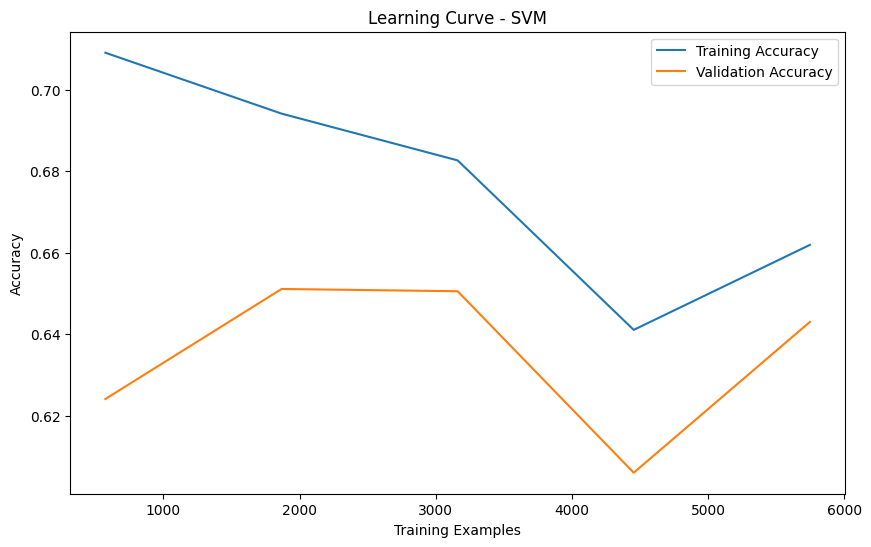

In [ ]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(best_dt_classifier, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.title('Learning Curve - SVM')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into features (X) and labels (y)
X = final_data.drop('Result', axis=1)
y = final_data['Result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid to search for XGBoost
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Instantiate the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to create the final model
best_xgb_classifier = XGBClassifier(random_state=42, **best_params)

# Train the final model
best_xgb_classifier.fit(X_train, y_train)

# Predict on the test set
y_test_pred = best_xgb_classifier.predict(X_test)

# Evaluate the final model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"XGBoost (Test): Accuracy - {accuracy_test:.4f}")

# Classification Report for Test Set
classification_rep_test = classification_report(y_test, y_test_pred)
print("\nClassification Report (Test Set):\n", classification_rep_test)

# Training Accuracy
y_train_pred = best_xgb_classifier.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f"XGBoost (Train): Accuracy - {accuracy_train:.4f}")

# Classification Report for Training Set
classification_rep_train = classification_report(y_train, y_train_pred)
print("\nClassification Report (Training Set):\n", classification_rep_train)


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
XGBoost (Test): Accuracy - 0.7006

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.71      0.69      0.70       898
           1       0.70      0.71      0.70       899

    accuracy                           0.70      1797
   macro avg       0.70      0.70      0.70      1797
weighted avg       0.70      0.70      0.70      1797

XGBoost (Train): Accuracy - 0.7493

Classification Report (Training Set):
               precision    recall  f1-score   support

           0       0.76      0.72      0.74      3593
           1       0.74      0.77      0.76      3592

    accuracy                           0.75      7185
   macro avg       0.75      0.75      0.75      7185
weighted avg       0.75      0.75      0.75      7185



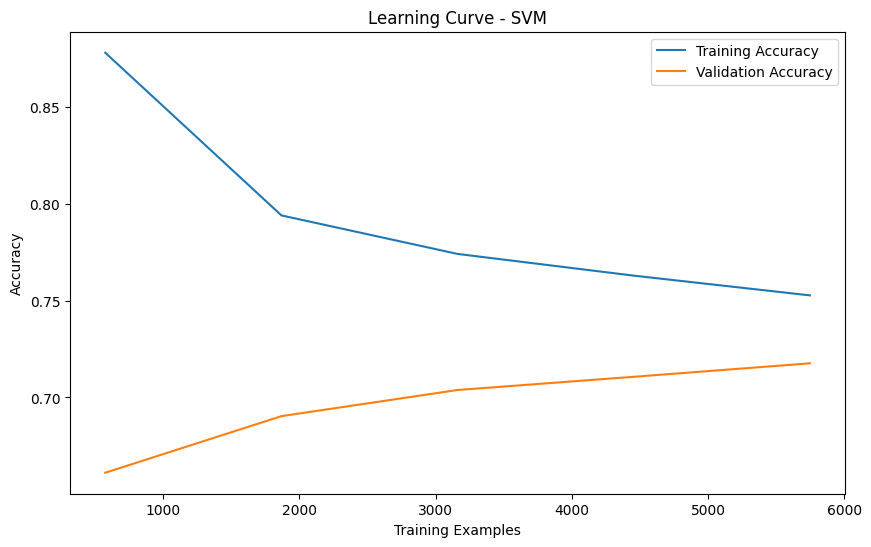

In [ ]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(best_xgb_classifier, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.title('Learning Curve - SVM')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Split the data into features (X) and labels (y)
X = final_data.drop('Result', axis=1)
y = final_data['Result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use the best parameters to create the final model
best_logreg_classifier = LogisticRegression(random_state=42, C=0.1, penalty='l2', solver='lbfgs')

# Train the final model
best_logreg_classifier.fit(X_train, y_train)

# Predict on the test set
y_test_pred = best_logreg_classifier.predict(X_test)

# Evaluate the final model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Logistic Regression (Test): Accuracy - {accuracy_test:.4f}")

# Classification Report for Test Set
classification_rep_test = classification_report(y_test, y_test_pred)
print("\nClassification Report (Test Set):\n", classification_rep_test)

# Training Accuracy
y_train_pred = best_logreg_classifier.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f"Logistic Regression (Train): Accuracy - {accuracy_train:.4f}")

# Classification Report for Training Set
classification_rep_train = classification_report(y_train, y_train_pred)
print("\nClassification Report (Training Set):\n", classification_rep_train)



Logistic Regression (Test): Accuracy - 0.6889

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.68      0.72      0.70       898
           1       0.70      0.66      0.68       899

    accuracy                           0.69      1797
   macro avg       0.69      0.69      0.69      1797
weighted avg       0.69      0.69      0.69      1797

Logistic Regression (Train): Accuracy - 0.7113

Classification Report (Training Set):
               precision    recall  f1-score   support

           0       0.71      0.72      0.71      3593
           1       0.72      0.70      0.71      3592

    accuracy                           0.71      7185
   macro avg       0.71      0.71      0.71      7185
weighted avg       0.71      0.71      0.71      7185



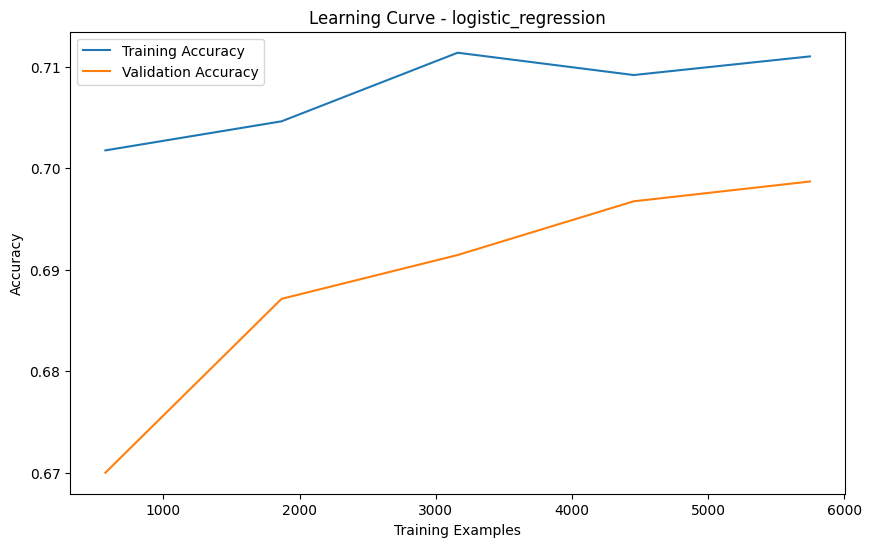

In [ ]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(best_logreg_classifier, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.title('Learning Curve - logistic_regression')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# import matplotlib.pyplot as plt

# # Data for each classifier
# classifiers = ['Logistic Regression', 'XGBoost', 'Decision Tree', 'SVM', 'Random Forest', 'KNN']
# test_accuracy = [0.6889, 0.7006, 0.6055, 0.6884, 0.6945, 0.6956]
# test_f1_score = [0.69, 0.70, 0.60, 0.69, 0.69, 0.70]
# test_precision = [0.69, 0.70, 0.60, 0.69, 0.69, 0.70]

# # Plotting the bar plot
# plt.figure(figsize=(10, 6))

# # Plotting test accuracy
# bar1 = plt.bar([i - 0.2 for i in range(len(classifiers))], test_accuracy, width=0.2, color='skyblue', label='Test Accuracy')
# # Plotting test F1 score
# bar2 = plt.bar([i for i in range(len(classifiers))], test_f1_score, width=0.2, color='lightgreen', label='Test F1 Score')
# # Plotting test precision
# bar3 = plt.bar([i + 0.2 for i in range(len(classifiers))], test_precision, width=0.2, color='salmon', label='Test Precision')

# plt.title('Test Metrics for Different Classifiers')
# plt.xlabel('Classifiers')
# plt.ylabel('Scores')
# plt.ylim(0, 1.0)
# plt.xticks(range(len(classifiers)), classifiers)
# plt.legend()

# # Adding annotations with performance metrics on top of the bars
# for bars in [bar1, bar2, bar3]:
#     for bar in bars:
#         yval = bar.get_height()
#         plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# plt.show()


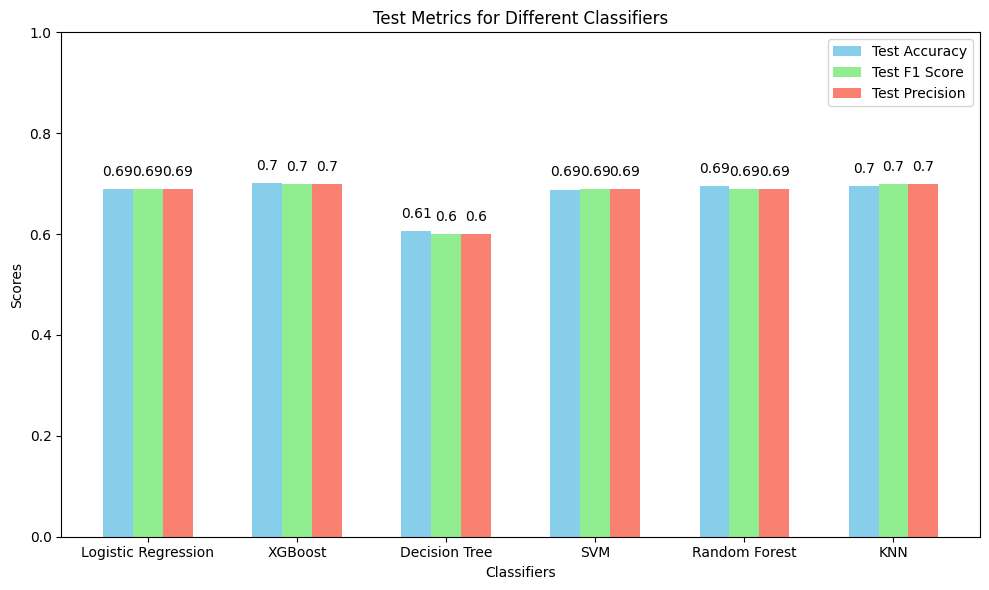

In [ ]:
import matplotlib.pyplot as plt

# Data for each classifier
classifiers = ['Logistic Regression', 'XGBoost', 'Decision Tree', 'SVM', 'Random Forest', 'KNN']
test_accuracy = [0.6889, 0.7006, 0.6055, 0.6884, 0.6945, 0.6956]
test_f1_score = [0.69, 0.70, 0.60, 0.69, 0.69, 0.70]
test_precision = [0.69, 0.70, 0.60, 0.69, 0.69, 0.70]

# Plotting the bar plot
plt.figure(figsize=(10, 6))

# Plotting test accuracy
bar_width = 0.2
bar1 = plt.bar([i - bar_width for i in range(len(classifiers))], test_accuracy, width=bar_width, color='skyblue', label='Test Accuracy')
# Plotting test F1 score
bar2 = plt.bar([i for i in range(len(classifiers))], test_f1_score, width=bar_width, color='lightgreen', label='Test F1 Score')
# Plotting test precision
bar3 = plt.bar([i + bar_width for i in range(len(classifiers))], test_precision, width=bar_width, color='salmon', label='Test Precision')

plt.title('Test Metrics for Different Classifiers')
plt.xlabel('Classifiers')
plt.ylabel('Scores')
plt.ylim(0, 1.0)
plt.xticks(range(len(classifiers)), classifiers)
plt.legend()

# Adding annotations with performance metrics on top of the bars
for bars in [bar1, bar2, bar3]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [ ]:
# # Example new match data
# new_match_data = pd.DataFrame({
#     'Team': ['India'],
#     'Score': [300],
#     'Overs': [50],
#     'RPO': [6],
#     'Inns': [1],
#     'Opposition': ['New Zealand'],
#     'Ground': ['Wankhede']
# })

# # Standard scaling for 'Score,' 'Overs,' and 'RPO'
# new_match_data[['Score', 'Overs', 'RPO']] = scaler.transform(new_match_data[['Score', 'Overs', 'RPO']])

# # One-hot encoding for 'Team,' 'Opposition,' and 'Ground'
# encoded_data_new_match = pd.get_dummies(new_match_data[['Team', 'Opposition', 'Ground']], columns=['Team', 'Opposition', 'Ground'])

# # Concatenate the encoded data with 'Score,' 'Overs,' 'RPO,' and 'Inns'
# new_match_features = pd.concat([new_match_data[['Score', 'Overs', 'RPO', 'Inns']], encoded_data_new_match], axis=1)

# # Ensure that the order of columns in new_match_features matches the order during training
# new_match_features = new_match_features.reindex(columns=X.columns, fill_value=0)

# # Use the already trained model to predict the outcome for the new match
# predicted_result = best_logreg_classifier.predict(new_match_features)



# # Map the predicted result back to its original label
# predicted_result_label = le.inverse_transform(predicted_result)

# print("Predicted Result for the New Match:")
# print(predicted_result_label)


Predicted Result for the New Match:
['won']


In [ ]:
# Example new match data
new_match_data = pd.DataFrame({
    'Team': ['India'],
    'Score': [150],
    'Overs': [50],
    'RPO': [6],
    'Inns': [1],
    'Opposition': ['Australia'],
    'Ground': ['Ahmedabad']
})

# Adding different data points by changing the 'Score'
scores_to_add = [160,170,180,190,200,210, 220, 230, 240, 250, 260,270,280,290,300,310,320,330,340,350,360,370,380,390,400]

# Create a list to hold the new dataframes
dfs_to_concat = []

for score in scores_to_add:
    overs = 50  # Assuming overs remain constant
    rpo = score / overs  # Calculate RPO based on Score and Overs
    new_data = {
        'Team': 'India',
        'Score': score,
        'Overs': overs,
        'RPO': rpo,
        'Inns': 1,
        'Opposition': 'Australia',
        'Ground': 'Ahmedabad'
    }
    dfs_to_concat.append(pd.DataFrame([new_data]))

# Concatenate the list of dataframes
new_match_data = pd.concat([new_match_data] + dfs_to_concat, ignore_index=True)


# Concatenate the list of dataframes
new_match_data = pd.concat([new_match_data] + dfs_to_concat, ignore_index=True)


# Assuming 'scaler' and 'le' have been defined and fitted during training
# Standard scaling for 'Score,' 'Overs,' and 'RPO'
new_match_data[['Score', 'Overs', 'RPO']] = scaler.transform(new_match_data[['Score', 'Overs', 'RPO']])

# One-hot encoding for 'Team,' 'Opposition,' and 'Ground'
encoded_data_new_match = pd.get_dummies(new_match_data[['Team', 'Opposition', 'Ground']], columns=['Team', 'Opposition', 'Ground'])

# Concatenate the encoded data with 'Score,' 'Overs,' 'RPO,' and 'Inns'
new_match_features = pd.concat([new_match_data[['Score', 'Overs', 'RPO', 'Inns']], encoded_data_new_match], axis=1)

# Ensure that the order of columns in new_match_features matches the order during training
new_match_features = new_match_features.reindex(columns=X.columns, fill_value=0)

# # Use the already trained model to predict the outcome for the new match
# predicted_result = best_logreg_classifier.predict(new_match_features)

# # Map the predicted result back to its original label
# predicted_result_label = le.inverse_transform(predicted_result)

# print("Predicted Result for the New Match:")
# print(predicted_result_label)
# Use the already trained model to predict the outcome for each score
for idx, score in enumerate(scores_to_add):
    predicted_result = best_logreg_classifier.predict(new_match_features.iloc[[idx]])
    predicted_result_label = le.inverse_transform(predicted_result)
    print(f"Score: {score}, Predicted Result: {predicted_result_label[0]}")

NameError: ignored

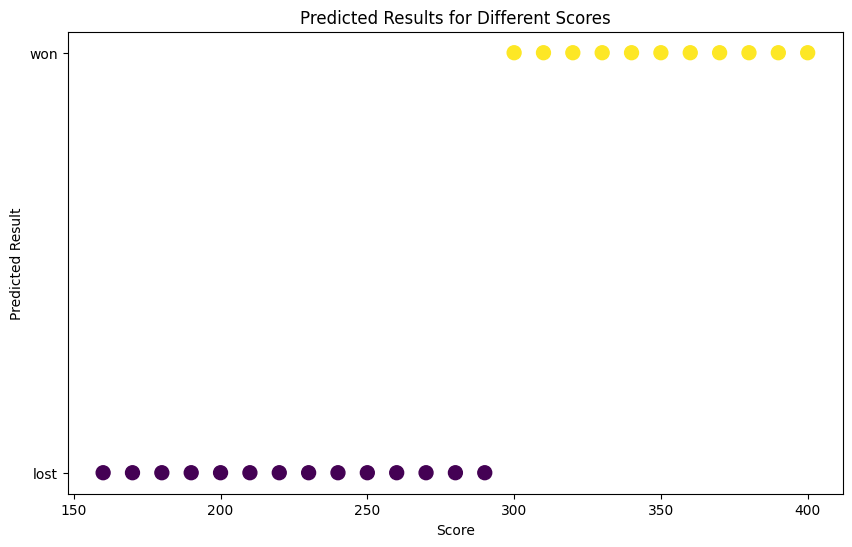

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Scores and corresponding predicted results
scores_to_add = [160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400]
predicted_results = ['lost', 'lost', 'lost', 'lost', 'lost', 'lost', 'lost', 'lost', 'lost', 'lost', 'lost', 'lost', 'lost', 'lost', 'won', 'won', 'won', 'won', 'won', 'won', 'won', 'won', 'won', 'won', 'won']

# Map 'won' to 1 and 'lost' to 0 for plotting
binary_values = np.array([1 if result == 'won' else 0 for result in predicted_results])

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(scores_to_add, binary_values, c=binary_values, cmap='viridis', marker='o', s=100)
plt.yticks([0, 1], ['lost', 'won'])
plt.xlabel('Score')
plt.ylabel('Predicted Result')
plt.title('Predicted Results for Different Scores')
plt.show()



In [ ]:
# Example new match data
new_match_data = pd.DataFrame({
    'Team': ['India'],
    'Score': [150],
    'Overs': [50],
    'RPO': [6],
    'Inns': [1],
    'Opposition': ['Australia'],
    'Ground': ['Ahmedabad']
})

# Adding different data points by changing the 'Score'
scores_to_add = [160,170,180,190,200,210, 220, 230, 240, 250, 260,270,280,290,300,310,320,330,340,350,360,370,380,390,400]

# Create a list to hold the new dataframes
dfs_to_concat = []

for score in scores_to_add:
    overs = 50  # Assuming overs remain constant
    rpo = score / overs  # Calculate RPO based on Score and Overs
    new_data = {
        'Team': 'Australia',
        'Score': score,
        'Overs': overs,
        'RPO': rpo,
        'Inns': 1,
        'Opposition': 'India',
        'Ground': 'Ahmedabad'
    }
    dfs_to_concat.append(pd.DataFrame([new_data]))

# Concatenate the list of dataframes
new_match_data = pd.concat([new_match_data] + dfs_to_concat, ignore_index=True)


# Concatenate the list of dataframes
new_match_data = pd.concat([new_match_data] + dfs_to_concat, ignore_index=True)


# Assuming 'scaler' and 'le' have been defined and fitted during training
# Standard scaling for 'Score,' 'Overs,' and 'RPO'
new_match_data[['Score', 'Overs', 'RPO']] = scaler.transform(new_match_data[['Score', 'Overs', 'RPO']])

# One-hot encoding for 'Team,' 'Opposition,' and 'Ground'
encoded_data_new_match = pd.get_dummies(new_match_data[['Team', 'Opposition', 'Ground']], columns=['Team', 'Opposition', 'Ground'])

# Concatenate the encoded data with 'Score,' 'Overs,' 'RPO,' and 'Inns'
new_match_features = pd.concat([new_match_data[['Score', 'Overs', 'RPO', 'Inns']], encoded_data_new_match], axis=1)

# Ensure that the order of columns in new_match_features matches the order during training
new_match_features = new_match_features.reindex(columns=X.columns, fill_value=0)

# # Use the already trained model to predict the outcome for the new match
# predicted_result = best_logreg_classifier.predict(new_match_features)

# # Map the predicted result back to its original label
# predicted_result_label = le.inverse_transform(predicted_result)

# print("Predicted Result for the New Match:")
# print(predicted_result_label)
# Use the already trained model to predict the outcome for each score
for idx, score in enumerate(scores_to_add):
    predicted_result = best_logreg_classifier.predict(new_match_features.iloc[[idx]])
    predicted_result_label = le.inverse_transform(predicted_result)
    print(f"Score: {score}, Predicted Result: {predicted_result_label[0]}")

Score: 160, Predicted Result: lost
Score: 170, Predicted Result: lost
Score: 180, Predicted Result: lost
Score: 190, Predicted Result: lost
Score: 200, Predicted Result: lost
Score: 210, Predicted Result: lost
Score: 220, Predicted Result: lost
Score: 230, Predicted Result: lost
Score: 240, Predicted Result: lost
Score: 250, Predicted Result: lost
Score: 260, Predicted Result: won
Score: 270, Predicted Result: won
Score: 280, Predicted Result: won
Score: 290, Predicted Result: won
Score: 300, Predicted Result: won
Score: 310, Predicted Result: won
Score: 320, Predicted Result: won
Score: 330, Predicted Result: won
Score: 340, Predicted Result: won
Score: 350, Predicted Result: won
Score: 360, Predicted Result: won
Score: 370, Predicted Result: won
Score: 380, Predicted Result: won
Score: 390, Predicted Result: won
Score: 400, Predicted Result: won


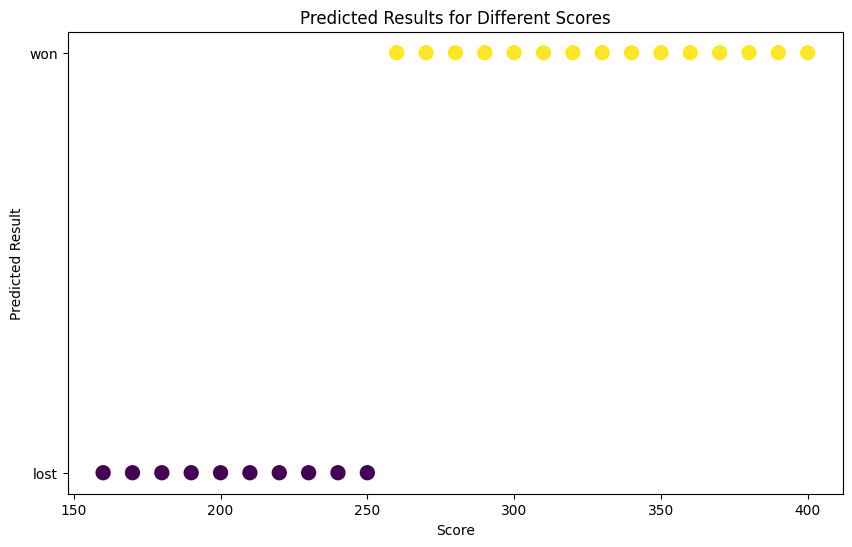

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Scores and corresponding predicted results
scores_to_add = [160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400]
predicted_results = ['lost', 'lost', 'lost', 'lost', 'lost', 'lost', 'lost', 'lost', 'lost', 'lost', 'won', 'won', 'won', 'won', 'won', 'won', 'won', 'won', 'won', 'won', 'won', 'won', 'won', 'won', 'won']

# Map 'won' to 1 and 'lost' to 0 for plotting
binary_values = np.array([1 if result == 'won' else 0 for result in predicted_results])

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(scores_to_add, binary_values, c=binary_values, cmap='viridis', marker='o', s=100)
plt.yticks([0, 1], ['lost', 'won'])
plt.xlabel('Score')
plt.ylabel('Predicted Result')
plt.title('Predicted Results for Different Scores')
plt.show()

In [ ]:
import pandas as pd

# Example new match data
new_match_data = pd.DataFrame({
    'Team': ['India'],
    'Score': [150],
    'Overs': [50],
    'RPO': [6],
    'Inns': [1],
    'Opposition': ['Australia'],
    'Ground': ['Wankhede']
})

# Adding different data points by changing the 'Score'
scores_to_add = [160,170,180,190,200,210, 220, 230, 240, 250, 260,270,280,290,300,310,320,330,340,350,360,370,380,390,400]

# Create a list to hold the new dataframes
dfs_to_concat = []

for score in scores_to_add:
    overs = 50  # Assuming overs remain constant
    rpo = score / overs  # Calculate RPO based on Score and Overs
    new_data = {
        'Team': 'India',
        'Score': score,
        'Overs': overs,
        'RPO': rpo,
        'Inns': 1,
        'Opposition': 'Australia',
        'Ground': 'Wankhede'
    }
    dfs_to_concat.append(pd.DataFrame([new_data]))

# Concatenate the list of dataframes
new_match_data = pd.concat([new_match_data] + dfs_to_concat, ignore_index=True)

# Assuming 'scaler' and 'le' have been defined and fitted during training
# Standard scaling for 'Score,' 'Overs,' and 'RPO'
new_match_data[['Score', 'Overs', 'RPO']] = scaler.transform(new_match_data[['Score', 'Overs', 'RPO']])

# One-hot encoding for 'Team,' 'Opposition,' and 'Ground'
encoded_data_new_match = pd.get_dummies(new_match_data[['Team', 'Opposition', 'Ground']], columns=['Team', 'Opposition', 'Ground'])

# Concatenate the encoded data with 'Score,' 'Overs,' 'RPO,' and 'Inns'
new_match_features = pd.concat([new_match_data[['Score', 'Overs', 'RPO', 'Inns']], encoded_data_new_match], axis=1)

# Ensure that the order of columns in new_match_features matches the order during training
new_match_features = new_match_features.reindex(columns=X.columns, fill_value=0)

# Use the already trained model to predict the outcome for each score
predictions = []

for idx, score in enumerate(scores_to_add):
    predicted_result = best_xgb_classifier.predict(new_match_features.iloc[[idx]])
    predicted_result_label = le.inverse_transform(predicted_result)
    predictions.append({'Score': score, 'Predicted_Result': predicted_result_label[0]})

# Convert the predictions list to a DataFrame
predictions_df = pd.DataFrame(predictions)

# Print the DataFrame
print(predictions_df)


    Score Predicted_Result
0     160              won
1     170             lost
2     180             lost
3     190             lost
4     200             lost
5     210             lost
6     220             lost
7     230             lost
8     240             lost
9     250             lost
10    260             lost
11    270             lost
12    280             lost
13    290             lost
14    300              won
15    310              won
16    320              won
17    330              won
18    340              won
19    350              won
20    360              won
21    370              won
22    380              won
23    390              won
24    400              won


In [ ]:
# KNeighborsClassifier

# Example new match data
new_match_data = pd.DataFrame({
    'Team': ['West Indies'],
    'Score': [150],
    'Overs': [50],
    'RPO': [6],
    'Inns': [1],
    'Opposition': ['Sri Lanka'],
    'Ground': ['Galle International Stadium']
})

# Adding different data points by changing the 'Score'
scores_to_add = [160,170,180,190,200,210, 220, 230, 240, 250, 260,270,280,290,300,310,320,330,340,350,360,370,380,390,400]

# Create a list to hold the new dataframes
dfs_to_concat = []

for score in scores_to_add:
    overs = 50  # Assuming overs remain constant
    rpo = score / overs  # Calculate RPO based on Score and Overs
    new_data = {
        'Team': 'West Indies',
        'Score': score,
        'Overs': overs,
        'RPO': rpo,
        'Inns': 1,
        'Opposition': 'Sri Lanka',
        'Ground': 'Galle International Stadium'
    }
    dfs_to_concat.append(pd.DataFrame([new_data]))

# Concatenate the list of dataframes
new_match_data = pd.concat([new_match_data] + dfs_to_concat, ignore_index=True)


# Concatenate the list of dataframes
new_match_data = pd.concat([new_match_data] + dfs_to_concat, ignore_index=True)


# Assuming 'scaler' and 'le' have been defined and fitted during training
# Standard scaling for 'Score,' 'Overs,' and 'RPO'
new_match_data[['Score', 'Overs', 'RPO']] = scaler.transform(new_match_data[['Score', 'Overs', 'RPO']])

# One-hot encoding for 'Team,' 'Opposition,' and 'Ground'
encoded_data_new_match = pd.get_dummies(new_match_data[['Team', 'Opposition', 'Ground']], columns=['Team', 'Opposition', 'Ground'])

# Concatenate the encoded data with 'Score,' 'Overs,' 'RPO,' and 'Inns'
new_match_features = pd.concat([new_match_data[['Score', 'Overs', 'RPO', 'Inns']], encoded_data_new_match], axis=1)

# Ensure that the order of columns in new_match_features matches the order during training
new_match_features = new_match_features.reindex(columns=X.columns, fill_value=0)

# # Use the already trained model to predict the outcome for the new match
# predicted_result = best_logreg_classifier.predict(new_match_features)

# # Map the predicted result back to its original label
# predicted_result_label = le.inverse_transform(predicted_result)

# print("Predicted Result for the New Match:")
# print(predicted_result_label)
# Use the already trained model to predict the outcome for each score
for idx, score in enumerate(scores_to_add):
    predicted_result = best_knn.predict(new_match_features.iloc[[idx]])
    predicted_result_label = le.inverse_transform(predicted_result)
    print(f"Score: {score}, Predicted Result: {predicted_result_label[0]}")

Score: 160, Predicted Result: won
Score: 170, Predicted Result: lost
Score: 180, Predicted Result: lost
Score: 190, Predicted Result: lost
Score: 200, Predicted Result: lost
Score: 210, Predicted Result: lost
Score: 220, Predicted Result: lost
Score: 230, Predicted Result: lost
Score: 240, Predicted Result: lost
Score: 250, Predicted Result: won
Score: 260, Predicted Result: won
Score: 270, Predicted Result: won
Score: 280, Predicted Result: won
Score: 290, Predicted Result: won
Score: 300, Predicted Result: won
Score: 310, Predicted Result: won
Score: 320, Predicted Result: won
Score: 330, Predicted Result: won
Score: 340, Predicted Result: won
Score: 350, Predicted Result: won
Score: 360, Predicted Result: won
Score: 370, Predicted Result: won
Score: 380, Predicted Result: won
Score: 390, Predicted Result: won
Score: 400, Predicted Result: won


In [ ]:
# KNeighborsClassifier

# Example new match data
new_match_data1 = pd.DataFrame({
    'Team': ['India'],
    'Score': [150],
    'Overs': [50],
    'RPO': [3],
    'Inns': [1],
    'Opposition': ['Australia'],
    'Ground': ['Ahmedabad']
})

# Adding different data points by changing the 'Score'
scores_to_add = [160,170,180,190,200,210, 220, 230, 240, 250, 260,270,280,290,300,310,320,330,340,350,360,370,380,390,400]

# Create a list to hold the new dataframes
dfs_to_concat = []

for score in scores_to_add:
    overs = 50  # Assuming overs remain constant
    rpo = score / overs  # Calculate RPO based on Score and Overs
    new_data = {
        'Team': 'India',
        'Score': score,
        'Overs': overs,
        'RPO': rpo,
        'Inns': 1,
        'Opposition': 'Australia',
        'Ground': 'Ahmedabad'
    }
    dfs_to_concat.append(pd.DataFrame([new_data]))

# Concatenate the list of dataframes
new_match_data1 = pd.concat([new_match_data1] + dfs_to_concat, ignore_index=True)


# Concatenate the list of dataframes
new_match_data1 = pd.concat([new_match_data1] + dfs_to_concat, ignore_index=True)

In [ ]:
new_match_data1.head(10)

,Team,Score,Overs,RPO,Inns,Opposition,Ground
0,India,150,50,3.0,1,Australia,Ahmedabad
1,India,160,50,3.2,1,Australia,Ahmedabad
2,India,170,50,3.4,1,Australia,Ahmedabad
3,India,180,50,3.6,1,Australia,Ahmedabad
4,India,190,50,3.8,1,Australia,Ahmedabad
5,India,200,50,4.0,1,Australia,Ahmedabad
6,India,210,50,4.2,1,Australia,Ahmedabad
7,India,220,50,4.4,1,Australia,Ahmedabad
8,India,230,50,4.6,1,Australia,Ahmedabad
9,India,240,50,4.8,1,Australia,Ahmedabad
